<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/EquationsOfState.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Equations of State
#@markdown In physics and thermodynamics, an equation of state is a thermodynamic equation relating state variables which describe the state of matter under a given set of physical conditions, such as pressure, volume, temperature (PVT), or internal energy. See [Wikipedia page on Equations Of State](https://en.wikipedia.org/wiki/Equation_of_state).
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

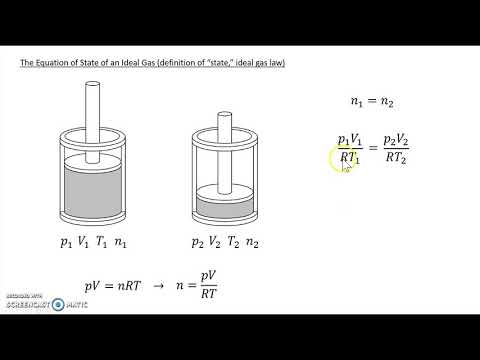

In [2]:
#@title  Introduction to Equations of State
#@markdown Introduction to equations of state with some common examples
from IPython.display import YouTubeVideo
YouTubeVideo('Svu8kpPRnlo', width=600, height=400)

## Cubic Equations of State
Equation of State are used to predict pure component and mixture properties such as compressibility, fugacity and mixture equilibrium.

Text(0, 0.5, 'Pressure [bara]')

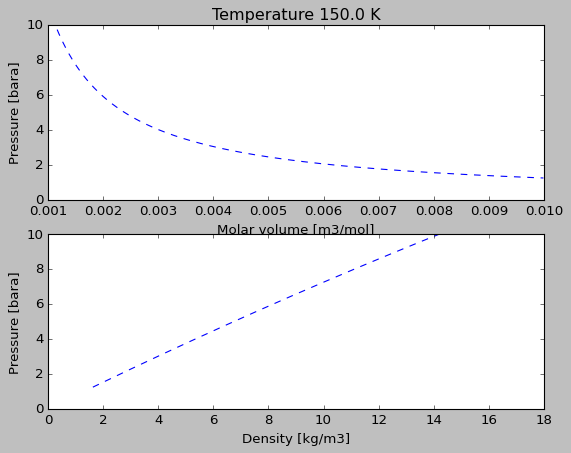

In [3]:
#@title Soave - Redlich - Kwong (SRK) EOS
#@markdown The SRK-EoS is defined as P = RT / (V - b)  - a α / V(V + b)
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('classic')

Tc= 190.0 #K
Pc = 76.4e5 #Pa
acsFactor=0.01 #-
MolarMass = 16.04 # gr/mol
R = 8.314 #J/mol/K
T = 150.0 #K
Tr = T/Tc #-

a = 0.42748*R*R*Tc*Tc/Pc
b = 0.08664*R*Tc/Pc
alpha = math.pow(1.0 + (0.48 + 1.574*acsFactor - 0.176*acsFactor*acsFactor)*(1.0 - math.pow(Tr,0.5)), 2.0)

def pressure(V):
  P = R*T/(V-b)- a*alpha/(V*(V + b))
  return P/1.0e5

molvolRange = np.arange(0.001, 0.010, 0.000010)
densRange =MolarMass/molvolRange/1000.0;
pressureRange = [pressure(vol) for vol in molvolRange]

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(molvolRange, pressureRange, '--')
plt.ylim(0, 10.0);
titale = 'Temperature '+str(T)+ ' K'
plt.title(titale)
plt.xlabel('Molar volume [m3/mol]')
plt.ylabel('Pressure [bara]')
plt.subplot(2, 1, 2)
plt.plot(densRange, pressureRange, '--')
plt.ylim(0, 10.0);
plt.xlabel('Density [kg/m3]')
plt.ylabel('Pressure [bara]')


In [4]:
#@title Calculation using SRK in NeqSim
#@markdown The following script calcluates the density of methane using SRK in NeqSim. Checking a point at 150 K and 4 bara

# Creating a fluid in neqsim
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 1.0) #adding 1 mole to the fluid
fluid1.setTemperature(150.0, 'K')
fluid1.setPressure(4.0, 'bara')
TPflash(fluid1)
fluid1.initProperties()

print("methane density ", fluid1.getDensity(), " kg/m3")

methane density  5.475101334801241  kg/m3


# Check of fugacity of CO2 in gas vs. partial pressure
The fugacity coefficient is defined as the ratio fugacity/pressure. For gases at low pressures (where the ideal gas law is a good approximation), fugacity is roughly equal to partial pressure (y*P). Thus, for an ideal gas, the ratio ϕ = f/P between fugacity f and pressure P (the fugacity coefficient) is equal to 1. In the follwong example we compare the fugacity of CO2 in a gas mixture to the partial pressure of CO2. We use SRK-EoS for calculating the fugacity. 

Text(0, 0.5, 'deviation [%]')

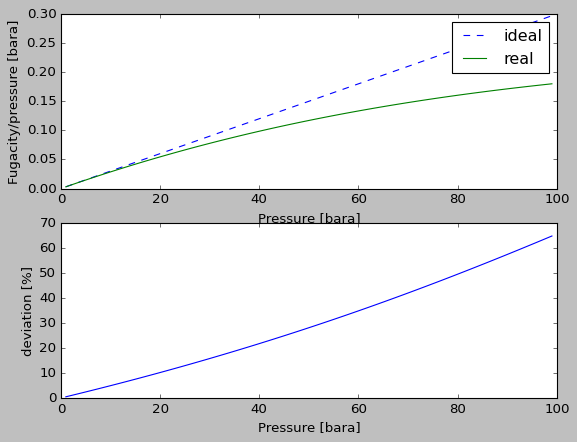

In [5]:
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

molFraction_CO2 = 0.003   #@param {type:"number"}
molFraction_methane = 0.897   #@param {type:"number"}
molFraction_ethane = 0.1   #@param {type:"number"}
temperature = 20.0   #@param {type:"number"}
minPressure = 1.0  #@param {type:"number"}
maxPressure = 100.0  #@param {type:"number"}

# Creating a fluid in neqsim
fluid1 = fluid('srk')
fluid1.addComponent('CO2', molFraction_CO2, 'mol/sec')
fluid1.addComponent('methane', molFraction_methane, 'mol/sec')
fluid1.addComponent('ethane', molFraction_ethane, 'mol/sec')

fluid1.setTemperature(temperature, 'C')

TPflash(fluid1);

def pressureCO2(pressure, temperature):
      fluid1.setPressure(pressure)
      fluid1.setTemperature(temperature, 'C')
      TPflash(fluid1);
      return fluid1.getPhase('gas').getComponent('CO2').getx()*fluid1.getPressure()

def fugacityCO2(pressure, temperature):
      fluid1.setPressure(pressure)
      fluid1.setTemperature(temperature, 'C')
      TPflash(fluid1);
      return fluid1.getPhase('gas').getFugacity('CO2')

pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/100)+1)

partialPressure = [pressureCO2(P,temperature) for P in pressure]
fugacity = [fugacityCO2(P,temperature) for P in pressure]
deviation = (np.array(partialPressure) - (np.array(fugacity)))/np.array(fugacity).tolist()*100.0

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(pressure, partialPressure, '--')
plt.plot(pressure, fugacity, '-')
plt.xlabel('Pressure [bara]')
plt.ylabel('Fugacity/pressure [bara]')
plt.legend(['ideal', 'real'])

plt.subplot(2, 1, 2)
plt.plot(pressure, deviation)
plt.xlabel('Pressure [bara]')
plt.ylabel('deviation [%]')

#Equations of State

See: https://ntnuopen.ntnu.no/ntnu-xmlui/handle/11250/231326

Equations of state play an important role in chemical engineering design, and they have
assumed an expanding role in the study of the phase equilibria of fluids and fluid mixtures. In
this section an introduction to equations of state based on the review article of Wei and Sadus
(2000) is presented. Originally, equations of state were used mainly for pure components.
When first applied to mixtures, they were used only for nonpolar (Soave, 1972; Peng and
Robinson, 1976) and slightly polar compounds (Huron et.al., 1978). Subsequently, equations
of state have developed rapidly for the calculation of phase equilibria in non-polar mixtures.
There are many advantages in using equations of state for phase equilibria calculations.
Equations of state can be used typically over wide ranges of temperatures and pressures, and
they can be applied to mixtures of diverse components, ranging from the light gases to heavy
liquids. They can be used to calculate vapour-liquid equilibria, liquid-liquid, and supercritical
fluid phase equilibria without any conceptual difficulties. The calculation of phase equilibria
has been discussed extensively elsewhere (Sandler 1994, Michelsen et.al. 2000).

The van der Walls equation of state was the first equation to predict vapour-liquid
coexistence. Later, the Redlich-Kwong equation of state (Redlich and Kwong, 1949)
improved the accuracy of the van der Waals equation by introducing temperature-dependence
for the attractive term. Soave (1972) and Peng and Robinson (1976) proposed additional
modifications to more accurately predict the vapour pressure, liquid density, and equilibria
ratios. In later work the attractive term in the Redlich and Kwong model has been modified to represent the vapour pressures of polar non-ideal components (Schwartzentruber and Renon
(1989), Mathias (1983)).

In addition of modelling small molecules, considerably emphasis has been placed recently on
modelling chain-like molecules. Based on the theories of Prigogine (1957) and Flory (1965),
other workers (Beret and Prausnitz, 1975; Donohue and Prausnitz, 1978) developed a
perturbed hard chain theory (PHCT) equation of state for chain molecules. To take into
account the increase in attractions due to dipolar and quadrupolar forces, Vilmalchand and
Donohue (1985) obtaines fairly accurate multipolar mixture calculations by using the
perturbed anisotropic chain theory (PACT). Ikonomu and Donohue (1986) extended PACT to
obtain an equation of state which takes into account the existence of hydrogen bounding,
namely, the associated perturbed anisotropic chain theory (APACT) equation of state.
Advances in statistical mechanics and an increased computer power have allowed the
development of equations of state based on molecular principles that are accurate for real
fluids and mixtures. Using Wertheim’s theory (Wertheim, 1984a,b), Chapman et.al. (1990)
and Huang and Radosz (1990) developed the statistical associating fluid theory (SAFT) which
is accurate for pure fluids and mixtures containing associating fluids. Recently, various
modified versions, such as LJ-SAFT (Banaszak et.al. 1994) and VR-SAFT (Gill-Villegas
et.al., 1997) have been developed. A common feature of many newly developed equation of
state is the increasing use of insights gained from molecular simulation to improve the
accuracy of the underlying model.

In this section some of the most common and some more resent equations of state will be
reviewed and tested for their capability to predict thermodynamic properties of pure
components. The components we will consider are methane, CO2, nitrogen, water and
MDEA. In section 3.4 mixing rules will be reviewed and evaluated. 

##Equation of State for Simple Molecules 
The van der Waals equation of state, proposed in 1873, was the first equation capable of
representing vapour-liquid coexistence. The VdW equation of state is given by The van der Waals equation of state, proposed in 1873, was the first equation capable of
representing vapour-liquid coexistence. The VdW equation of state is given by .....

In [23]:
#
# Script bubp.py - calculation of saturated properties
# of pure components
# Even Solbraa, 2001
#
# Create a thermodynamic system - using the preferred
# equation of state (eg. srk, cpa,pr)
system = fluid('srk')
system.setPressure(1.0, 'bara')
# Add a component to the system
addComponent(system,'water',1.0)
# do a bubble point temperature flash
bubt(system)
print('buble point temperature', system.getTemperature('C'))
#printFrame(system)

buble point temperature 102.08743210205034
